# AnimationWidget. Basics

Introduction
============

This notebook presents the animationwidget. It provides a periodic timer. This timer delivers a pulse that can drive animations in a notebook.

Under the hull, this widget uses the javascript [setTimeout() function](http://www.w3schools.com/jsref/met_win_settimeout.asp) to periodically change a value in a Python model. This value can then be connected to other widgets.

For more details about widgets , I recommend the [PyDataParis2016 tutorial by Sylvain Corlet](https://github.com/SylvainCorlay/PyDataParis2016/blob/master/Index.ipynb)

In [1]:
from __future__ import print_function
import animationwidget

In [2]:
w = animationwidget.AnimationWidget()

In [3]:
w

The widget has the following attributes:
* value: a float in [0,1] interval. The timer periodically changes this value
* run: a boolean that triggers the timer. 
* period: signal period (in milliseconds). It is the time for the counter to go from 0.0 to 1.0
* sampling: sampling rate, interval between two pulses of the trigger.

In [13]:
w.run = True

In [5]:
import numpy as np

class RingBufferArray(object):
    """
    A class that keep a window of the N last values
    """
    def __init__(self, size, dtype):
        """
        :param size: windows size
        :param dtype: data type
        """
        self._values = np.zeros(size, dtype=dtype)
        self._start_index = 0
        self._len = size
        

    def __call__(self, new_value):
        """
        Add the new value to the window. Return the full signal
        """
        # Push value
        self._values[self._start_index] = new_value
        self._start_index = (self._start_index + 1) % self._len
        return np.append(self._values[self._start_index:], self._values[:self._start_index])


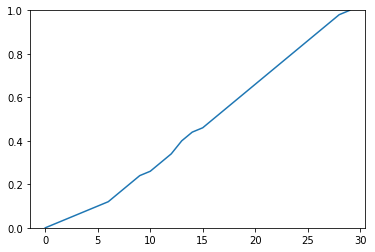

In [32]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

class SignalViewer(object):
    def __init__(self, size):
        self.buff = RingBufferArray(size, np.float64)
        self.x = np.arange(size)
    def update(self, new_value):
        clear_output(wait=True)
        self.fig, self.ax = plt.subplots(1,1)
        self.ax.set_ylim(0, 1)
        self.ax.plot(self.x, self.buff(new_value))
        #display(self.fig)

s = SignalViewer(30)  
anim = animationwidget.AnimationWidget()
display(anim)
anim.observe(lambda value: s.update(value["new"]), names='value')


In [33]:
anim.run = True

In [11]:
anim